In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = tf.keras.datasets.fashion_mnist

# Extract: training_images & training_labels are NumPy arrays
(train_features, training_labels), (test_features, test_labels) = data.load_data()

LABEL: 8

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   4   0  65 123  65  62  25   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   2 159 158 168 156 180 190 178 178 179 180 179 179 178 174 170 184 185 157 146 149  99   0]
 [  0   0   0   0   0 163 182 166 167 170 174 179 

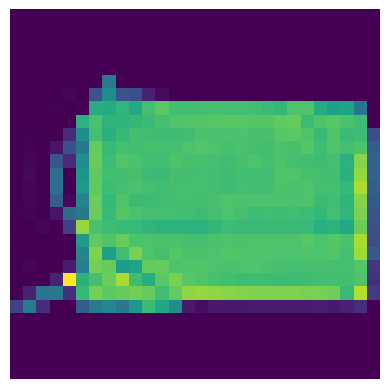

In [53]:
# Show
index = 18

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f'LABEL: {test_labels[index]}') # as numbers
print(f'\nIMAGE PIXEL ARRAY:\n {test_features[index]}') # image
plt.grid(False)
plt.axis('off')
plt.set_cmap('viridis')
plt.imshow(test_features[index])

In [54]:
features = test_features.reshape(test_features.shape[0], -1)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

features_pca = pca.fit_transform(StandardScaler().fit_transform(features))

print('Explained variances: ', pca.explained_variance_)

print('Explained variances (ratio): ', pca.explained_variance_ratio_)

Explained variances:  [173.67488588 112.39125963  43.0300822   40.00863069  31.89091725]
Explained variances (ratio):  [0.22150194 0.14334186 0.05487982 0.05102631 0.04067312]


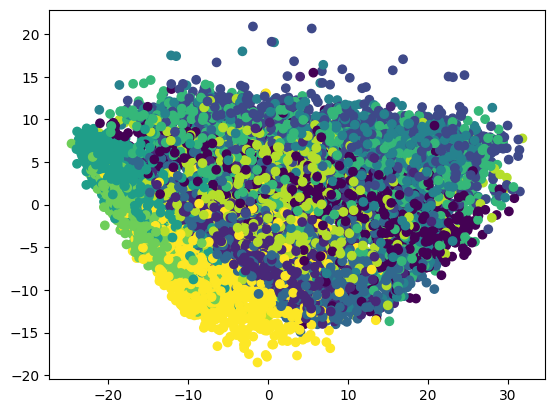

In [57]:
_, ax = plt.subplots()
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 2], c=test_labels)

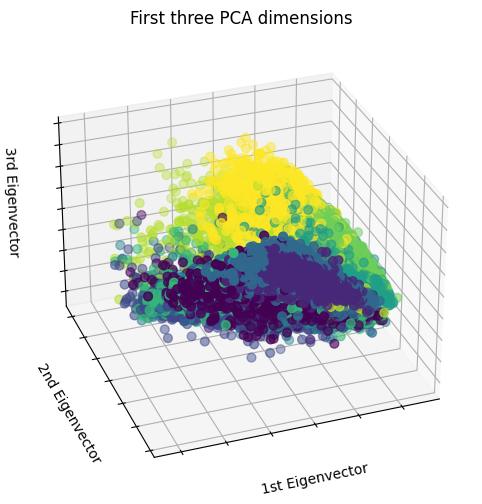

In [58]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    features_pca[:, 0],
    features_pca[:, 1],
    features_pca[:, 2],
    c=test_labels,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()